## 서울시에서 공개한 코로나19 발생동향 분석
* http://www.seoul.go.kr/coronaV/coronaStatus.do

## 분석에 사용할 Pandas 주요기능
* Pandas cheat sheet 를 함께 보세요! : [Pandas_Cheat_Sheet.pdf](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)

* 파일 불러오기
    * to_csv("파일명", index=False) : csv 파일로 저장하기
    * read_csv("파일명") : csv 파일 불러오기
    
* Pandas를 통한 파일 저장과 불러오기
    * shape를 통한 행과 열의 수 보기
    * head, tail, sample 을 통한 일부 데이터 가져오기
    
* DataFrame의 info(), describe() 등을 통한 요약과 기술통계 값 구하기
    * info()
    * describe()
    * nunique()
    * index
    * columns
    * values
    
* Pandas의  DataFrame과 Series의 이해
    * Series : 1차원 벡터구조
    * DataFrame : 2차원 행렬구조
    
* 색인하기
    * [컬럼]
    * .loc[행]
    * .loc[행, 열]
    * .loc[조건식, 열]
    
* DataFrame의 데이터 타입 이해하기
    * 날짜 데이터의 변환
    
* DataFrame 다루기
    * 열(column) 인덱싱
    * 행(index) 인덱싱
    * 행, 열 인덱싱
    * 정렬하기 : sort_values 사용하기
    * 조건식 사용하기

* 빈도수 구하기
    * 한 개의 변수 : series.value_counts()
    * 두 개의 변수 : pd.crosstab()

* groupby 와 pivot_table
    * 다양한 연산식의 사용


## 라이브러리 로드

In [1]:
# pandas, numpy, matplotlib.pyplot 불러오기

import pandas as pd
import numpy as pandas
import matplotlib.pyplot as plt

## 시각화 기본 명칭 확인하기
* [Anatomy of a figure — Matplotlib documentation](https://matplotlib.org/stable/gallery/showcase/anatomy.html)

## 시각화 한글폰트 설정하기

In [2]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [3]:
# 일부 스타일은 폰트 설정을 초기화 하기 때문에 style 설정 시 
# 폰트 설정이 초기화 되지 않도록 폰트 설정 위에 지정해 주세요.
plt.style.use("fivethirtyeight")

In [4]:
# 윈도우 : "Malgun Gothic"
# 맥 : "AppleGothic"

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

<AxesSubplot:title={'center':'한글'}>

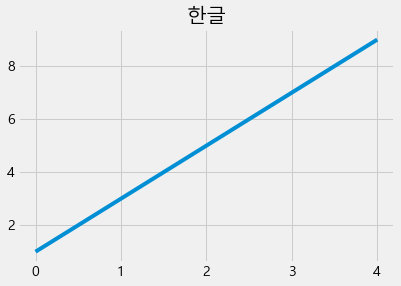

In [5]:
# 그래프 그려보기
pd.Series([1,3,5,7,9]).plot(title='한글')

## 파일 불러오기
<img src="https://pandas.pydata.org/docs/_images/02_io_readwrite.svg">

In [6]:
# seoul-covid19-2021-01-03.csv 불러오기
# df_01 변수에 담아 재사용합니다.
# df_01

df_01 = pd.read_csv('seoul-covid19-2021-01-03.csv')
df_01.shape

(20000, 7)

## head, tail, sample 로 일부 데이터만 보기

In [7]:
# seoul-covid19-2021-06-14.csv 불러오기
# df_02 변수에 담아 재사용합니다.
# df_02

df_02 = pd.read_csv('seoul-covid19-2021-06-14.csv')
df_02.shape

(26732, 7)

In [8]:
# 일부데이터만 가져와보기
df_02.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,46732,148595,2021-06-14,타시도,-,감염경로 조사중,NaN
1,46731,148559,2021-06-14,성동구,-,감염경로 조사중,NaN
2,46730,148455,2021-06-14,중랑구,-,감염경로 조사중,NaN
3,46729,148370,2021-06-14,강동구,-,감염경로 조사중,NaN
4,46728,148303,2021-06-14,광진구,카자흐스탄,감염경로 조사중,NaN


## concat 으로 여러 개의 데이터프레임 합치기


* axis = 0

<img src="https://pandas.pydata.org/docs/_images/merging_concat_basic.png">

* axis = 1 
<img src="https://pandas.pydata.org/docs/_images/merging_concat_axis1.png">

* 결측치를 제외하기 join="inner"
<img src="https://pandas.pydata.org/docs/_images/merging_concat_axis1_inner.png">


* [Merge, join, concatenate and compare documentation](https://pandas.pydata.org/docs/user_guide/merging.html#merge-join-concatenate-and-compare)

In [9]:
# pd.concat 으로 [df_01, df_02] 합치고 df 변수에 할당하기
# df

df = pd.concat([df_01, df_02])
df.shape

(46732, 7)

## 합친 데이터 확인하기

In [10]:
# head, tail, sample 을 통해 데이터 확인하기
# 연번 = 서울, 환자 = 전국

df

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,20000,64010,2021-01-03,종로구,-,타시도 확진자 접촉,퇴원
1,19999,64155,2021-01-03,강서구,-,감염경로 조사중,퇴원
2,19998,64083,2021-01-03,노원구,-,기타 확진자 접촉,퇴원
3,19997,64263,2021-01-02,마포구,-,기타 확진자 접촉,퇴원
4,19996,64264,2021-01-02,광진구,-,감염경로 조사중,퇴원
...,...,...,...,...,...,...,...
26727,20005,63568,2021-01-03,마포구,-,기타 확진자 접촉,퇴원
26728,20004,63560,2021-01-03,타시도,-,타시도 확진자 접촉,퇴원
26729,20003,63545,2021-01-03,중구,-,감염경로 조사중,퇴원
26730,20002,63500,2021-01-03,구로구,-,감염경로 조사중,사망


In [11]:
df.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,20000,64010,2021-01-03,종로구,-,타시도 확진자 접촉,퇴원
1,19999,64155,2021-01-03,강서구,-,감염경로 조사중,퇴원
2,19998,64083,2021-01-03,노원구,-,기타 확진자 접촉,퇴원
3,19997,64263,2021-01-02,마포구,-,기타 확진자 접촉,퇴원
4,19996,64264,2021-01-02,광진구,-,감염경로 조사중,퇴원


In [12]:
df.tail()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
26727,20005,63568,2021-01-03,마포구,-,기타 확진자 접촉,퇴원
26728,20004,63560,2021-01-03,타시도,-,타시도 확진자 접촉,퇴원
26729,20003,63545,2021-01-03,중구,-,감염경로 조사중,퇴원
26730,20002,63500,2021-01-03,구로구,-,감염경로 조사중,사망
26731,20001,63375,2021-01-03,타시도,-,감염경로 조사중,퇴원


## 인덱스 값 설정하기
* 전체 데이터프레임의 행의 갯수와 "연번"의 유일값을 확인하면 중복값이 없는 것으로 확인할 수 있습니다.
* shape와 nunique()로 행의 수와 유일값이 일치하는지 확인합니다.

In [13]:
# shape
df.shape

(46732, 7)

In [14]:
# 연번의 nunique()
df['연번'].nunique()

46732

In [15]:
# set_index 를 통해 인덱스 값을 변경합니다.
df = df.set_index('연번')

In [16]:
df

,환자,확진일,거주지,여행력,접촉력,퇴원현황
연번,,,,,,
20000,64010,2021-01-03,종로구,-,타시도 확진자 접촉,퇴원
19999,64155,2021-01-03,강서구,-,감염경로 조사중,퇴원
19998,64083,2021-01-03,노원구,-,기타 확진자 접촉,퇴원
19997,64263,2021-01-02,마포구,-,기타 확진자 접촉,퇴원
19996,64264,2021-01-02,광진구,-,감염경로 조사중,퇴원
...,...,...,...,...,...,...
20005,63568,2021-01-03,마포구,-,기타 확진자 접촉,퇴원
20004,63560,2021-01-03,타시도,-,타시도 확진자 접촉,퇴원
20003,63545,2021-01-03,중구,-,감염경로 조사중,퇴원


## 연번 순으로 정렬하기

In [17]:
# sort_index 를 통해 인덱스값 기준으로 정렬합니다.
df = df.sort_index(ascending=False)
df

,환자,확진일,거주지,여행력,접촉력,퇴원현황
연번,,,,,,
46732,148595,2021-06-14,타시도,-,감염경로 조사중,NaN
46731,148559,2021-06-14,성동구,-,감염경로 조사중,NaN
46730,148455,2021-06-14,중랑구,-,감염경로 조사중,NaN
46729,148370,2021-06-14,강동구,-,감염경로 조사중,NaN
46728,148303,2021-06-14,광진구,카자흐스탄,감염경로 조사중,NaN
...,...,...,...,...,...,...
5,9,2020-01-31,성북구,-,기타 확진자 접촉,퇴원
4,7,2020-01-30,마포구,중국,해외유입,퇴원
3,6,2020-01-30,종로구,-,종로구 집단발병,퇴원


In [18]:
# head 로 미리보기 합니다.
df.head()

,환자,확진일,거주지,여행력,접촉력,퇴원현황
연번,,,,,,
46732,148595,2021-06-14,타시도,-,감염경로 조사중,NaN
46731,148559,2021-06-14,성동구,-,감염경로 조사중,NaN
46730,148455,2021-06-14,중랑구,-,감염경로 조사중,NaN
46729,148370,2021-06-14,강동구,-,감염경로 조사중,NaN
46728,148303,2021-06-14,광진구,카자흐스탄,감염경로 조사중,NaN


In [19]:
# tail로 미리보기 합니다.
df.tail()

,환자,확진일,거주지,여행력,접촉력,퇴원현황
연번,,,,,,
5,9,2020-01-31,성북구,-,기타 확진자 접촉,퇴원
4,7,2020-01-30,마포구,중국,해외유입,퇴원
3,6,2020-01-30,종로구,-,종로구 집단발병,퇴원
2,5,2020-01-30,중랑구,중국,해외유입,퇴원
1,2,2020-01-24,강서구,중국,해외유입,퇴원


## 판다스의 attributes
* [Series — pandas documentation](https://pandas.pydata.org/docs/reference/series.html#attributes)
* [DataFrame — pandas documentation](https://pandas.pydata.org/docs/reference/frame.html#attributes-and-underlying-data)


In [20]:
# shape
df.shape

(46732, 6)

In [21]:
# dtypes
df.dtypes

환자       int64
확진일     object
거주지     object
여행력     object
접촉력     object
퇴원현황    object
dtype: object

In [22]:
# columns
df.columns

Index(['환자', '확진일', '거주지', '여행력', '접촉력', '퇴원현황'], dtype='object')

In [23]:
# index
df.index

Int64Index([46732, 46731, 46730, 46729, 46728, 46727, 46726, 46725, 46724,
            46723,
            ...
               10,     9,     8,     7,     6,     5,     4,     3,     2,
                1],
           dtype='int64', name='연번', length=46732)

In [24]:
df.reset_index()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,46732,148595,2021-06-14,타시도,-,감염경로 조사중,NaN
1,46731,148559,2021-06-14,성동구,-,감염경로 조사중,NaN
2,46730,148455,2021-06-14,중랑구,-,감염경로 조사중,NaN
3,46729,148370,2021-06-14,강동구,-,감염경로 조사중,NaN
4,46728,148303,2021-06-14,광진구,카자흐스탄,감염경로 조사중,NaN
...,...,...,...,...,...,...,...
46727,5,9,2020-01-31,성북구,-,기타 확진자 접촉,퇴원
46728,4,7,2020-01-30,마포구,중국,해외유입,퇴원
46729,3,6,2020-01-30,종로구,-,종로구 집단발병,퇴원
46730,2,5,2020-01-30,중랑구,중국,해외유입,퇴원


## 데이터 요약

In [25]:
# info를 통해 데이터를 요약합니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46732 entries, 46732 to 1
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   환자      46732 non-null  int64 
 1   확진일     46732 non-null  object
 2   거주지     46732 non-null  object
 3   여행력     46732 non-null  object
 4   접촉력     46732 non-null  object
 5   퇴원현황    44118 non-null  object
dtypes: int64(1), object(5)
memory usage: 2.5+ MB


## 결측치 보기

In [26]:
# 결측치의 합계를 구합니다.
# isnull()
df.isnull().sum()

환자         0
확진일        0
거주지        0
여행력        0
접촉력        0
퇴원현황    2614
dtype: int64

In [27]:
# 평균(mean)을 통해 결측치의 비율을 구합니다.
df.isnull().mean() * 100

환자      0.000000
확진일     0.000000
거주지     0.000000
여행력     0.000000
접촉력     0.000000
퇴원현황    5.593598
dtype: float64

## 기술통계

In [28]:
# describe()로 기술통계 값을 구합니다.
df.describe()

,환자
count,46732.000000
mean,76964.882885
std,40747.410181
min,2.000000
25%,41485.750000
50%,75150.000000
75%,112701.000000
max,148645.000000


In [29]:
# describe(include="object") 로 문자 데이터에 대한 기술통계 값을 구합니다.
df.describe(include="object") 

,확진일,거주지,여행력,접촉력,퇴원현황
count,46732,46732,46732,46732,44118
unique,476,27,151,779,2
top,2020-12-17,송파구,-,기타 확진자 접촉,퇴원
freq,588,2824,45565,15721,43617


## 날짜 데이터 타입 변경하기

* 확진일 Series 형태로 가져오기
<img src="https://pandas.pydata.org/docs/_images/01_table_series.svg">

In [30]:
# 확진일 Series 형태로 가져오기
df['확진일'].head(1)

연번
46732    2021-06-14
Name: 확진일, dtype: object

In [31]:
# df['확진일'] dtype이 object 임으로 데이터 타입을 datetime으로 전처리 해줘야 한다.
# pd.to_datetime 을 통한 데이터 타입 변경하기
pd.to_datetime(df['확진일'])

연번
46732   2021-06-14
46731   2021-06-14
46730   2021-06-14
46729   2021-06-14
46728   2021-06-14
           ...    
5       2020-01-31
4       2020-01-30
3       2020-01-30
2       2020-01-30
1       2020-01-24
Name: 확진일, Length: 46732, dtype: datetime64[ns]

In [32]:
df['확진일'] = pd.to_datetime(df['확진일'])

In [33]:
# df["확진일"]을 head() 로 일부만 가져와서 타입이  datetime64 형태로 변경되었는지 확인하기
df['확진일'].head()

연번
46732   2021-06-14
46731   2021-06-14
46730   2021-06-14
46729   2021-06-14
46728   2021-06-14
Name: 확진일, dtype: datetime64[ns]

## 파생변수 만들기
### 연, 월, 일, 요일 만들기

In [34]:
# 연도 파생변수 만들기
# df["연도"]
# df['확진일'] = datetime64[ns] 확인가능

df['연도'] = df['확진일'].dt.year

In [35]:
# 월(month), 일(day), 요일(dayofweek) 만들기
# df["월"]
# df["일"]
# df["요일"]

df["월"] = df['확진일'].dt.month
df["일"] = df['확진일'].dt.day
df["요일"] = df['확진일'].dt.dayofweek

df.head()

,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도,월,일,요일
연번,,,,,,,,,,
46732,148595,2021-06-14,타시도,-,감염경로 조사중,NaN,2021,6,14,0
46731,148559,2021-06-14,성동구,-,감염경로 조사중,NaN,2021,6,14,0
46730,148455,2021-06-14,중랑구,-,감염경로 조사중,NaN,2021,6,14,0
46729,148370,2021-06-14,강동구,-,감염경로 조사중,NaN,2021,6,14,0
46728,148303,2021-06-14,광진구,카자흐스탄,감염경로 조사중,NaN,2021,6,14,0


In [36]:
# 영어 방식
df['확진일'].dt.day_name()

연번
46732      Monday
46731      Monday
46730      Monday
46729      Monday
46728      Monday
           ...   
5          Friday
4        Thursday
3        Thursday
2        Thursday
1          Friday
Name: 확진일, Length: 46732, dtype: object

In [37]:
# 확진일, 연도, 월, 일, 요일 컬럼만 가져오기
# head 로 일부만 가져와 파생변수가 잘 생성되었는지 확인하기
df[['확진일', '연도', '월', '일', '요일']].head()

,확진일,연도,월,일,요일
연번,,,,,
46732,2021-06-14,2021,6,14,0
46731,2021-06-14,2021,6,14,0
46730,2021-06-14,2021,6,14,0
46729,2021-06-14,2021,6,14,0
46728,2021-06-14,2021,6,14,0


### 연도-월 만들기

In [38]:
# 연도-월 파생변수 만들기
# astype(str) 을 통해 수치 데이터를 문자 데이터로 변환하고 문자열 연결하기
# df["연도월"]

df["연도월"] = df['확진일'].astype(str).str[:7]
df.head(1)


,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도,월,일,요일,연도월
연번,,,,,,,,,,,
46732,148595,2021-06-14,타시도,-,감염경로 조사중,NaN,2021,6,14,0,2021-06


In [39]:
# 문자열 슬라이싱으로도 만들 수 있습니다.
# df["연도월"]
# 0이 안나오는 이유는 df['월']는 06이 아닌 6으로 나와서

df['연도'].astype(str) + "-" + df['월'].astype(str)

연번
46732    2021-6
46731    2021-6
46730    2021-6
46729    2021-6
46728    2021-6
          ...  
5        2020-1
4        2020-1
3        2020-1
2        2020-1
1        2020-1
Length: 46732, dtype: object

In [40]:
# df["연도월"]이 잘 생성되었는지 확인하기
df["연도월"].head()

연번
46732    2021-06
46731    2021-06
46730    2021-06
46729    2021-06
46728    2021-06
Name: 연도월, dtype: object

### 요일 한글로 만들기
* 함수와 Series의 map 활용

In [41]:
dayofweek = "월화수목금토일"
dayofweek[1]

'화'

In [42]:
#find_dayofweek 함수로 요일 숫자를 넘겨주면 요일명을 반환하는 함수

def find_dayofweek(day_no):
    dayofweek = "월화수목금토일"
    return dayofweek[day_no]


In [43]:
# 함수가 잘 만들어졌는지 확인하기
find_dayofweek(3)

'목'

In [44]:
# 함수가 잘 만들어졌는지 확인하기
# 숫자가 아니라 '월~일'로 바꾸고 싶음
df['요일']

연번
46732    0
46731    0
46730    0
46729    0
46728    0
        ..
5        4
4        3
3        3
2        3
1        4
Name: 요일, Length: 46732, dtype: int64

In [45]:
# map : Series
# apply : Series, dataframe

# map을 사용해서 요일 컬럼을 요일명으로 변환하고 "요일명"이라는 새로운 컬럼에 저장하기
# df["요일명"]
# 위 (숫자) -> 아래 (문자['월'])

df['요일명'] = df['요일'].map(find_dayofweek)
df.head(1)

,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도,월,일,요일,연도월,요일명
연번,,,,,,,,,,,,
46732,148595,2021-06-14,타시도,-,감염경로 조사중,NaN,2021,6,14,0,2021-06,월


In [46]:
df['요일명'] = df['요일'].apply(find_dayofweek)
df.head(1)

,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도,월,일,요일,연도월,요일명
연번,,,,,,,,,,,,
46732,148595,2021-06-14,타시도,-,감염경로 조사중,NaN,2021,6,14,0,2021-06,월


In [47]:
# ["요일", "요일명"]을 sample(5) 로 임의의 5개만 불러와 잘 변환이 되었는지 확인하기
df[["요일", "요일명"]].sample(5)

,요일,요일명
연번,,
31786,0,월
791,1,화
25862,3,목
29594,3,목
7260,4,금


In [48]:
# 영어 방식

## 전체 수치 변수 히스토그램 그리기

In [49]:
# df.hist로 히스토그램 그리기
df.describe()

,환자,연도,월,일,요일
count,46732.000000,46732.000000,46732.000000,46732.000000,46732.000000
mean,76964.882885,2020.585038,6.364354,15.874904,2.933728
std,40747.410181,0.492721,3.958985,8.805127,1.914244
min,2.000000,2020.000000,1.000000,1.000000,0.000000
25%,41485.750000,2020.000000,3.000000,8.000000,1.000000
50%,75150.000000,2021.000000,5.000000,16.000000,3.000000
75%,112701.000000,2021.000000,11.000000,24.000000,5.000000
max,148645.000000,2021.000000,12.000000,31.000000,6.000000


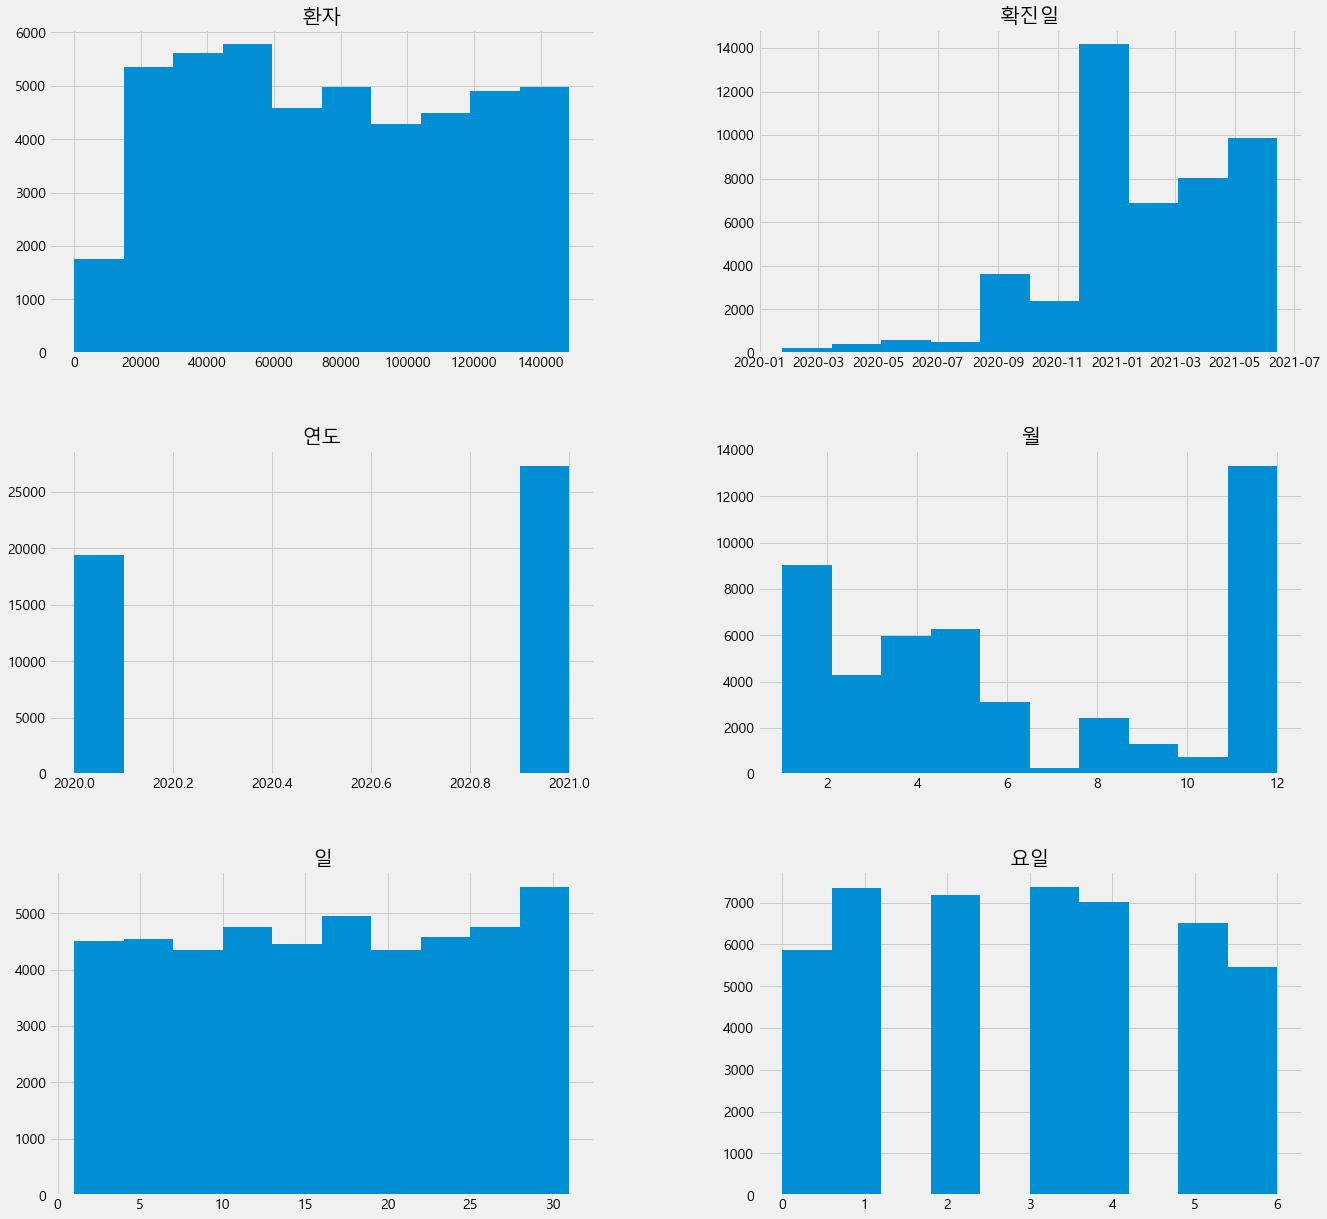

In [50]:
_ = df.hist(figsize=(20,20))

## value_counts로 하나의 변수에 대한 빈도수 구하기
### 연도

In [51]:
# "연도" 컬럼을 통해 빈도수 구하기
df['연도'].value_counts()

2021    27340
2020    19392
Name: 연도, dtype: int64

In [52]:
# "연도" 컬럼의 비율 구하기
df['연도'].value_counts(normalize=True) * 100

2021    58.503809
2020    41.496191
Name: 연도, dtype: float64

### 연도월

In [53]:
# 연도월에 대한 빈도수 구하기
# 빈도수를 구하고 sort_index 로 정렬합니다.
# year_month

year_month = df['연도월'].value_counts().sort_index()
year_month

2020-01        7
2020-02       80
2020-03      391
2020-04      156
2020-05      229
2020-06      459
2020-07      281
2020-08     2415
2020-09     1306
2020-10      733
2020-11     2904
2020-12    10431
2021-01     4879
2021-02     4061
2021-03     3898
2021-04     5804
2021-05     6030
2021-06     2668
Name: 연도월, dtype: int64

<AxesSubplot:title={'center':'연도월 확진자 수'}>

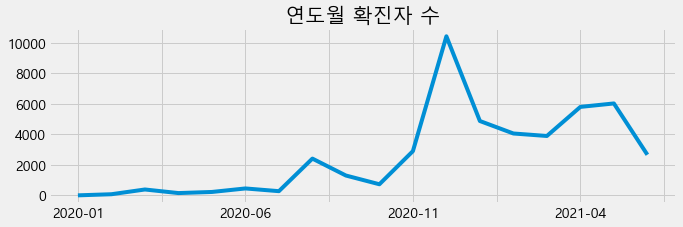

In [54]:
# 연도월을 시각화 합니다.
year_month.plot(title='연도월 확진자 수', figsize=(10, 3))

<AxesSubplot:title={'center':'연도월 확진자 수'}>

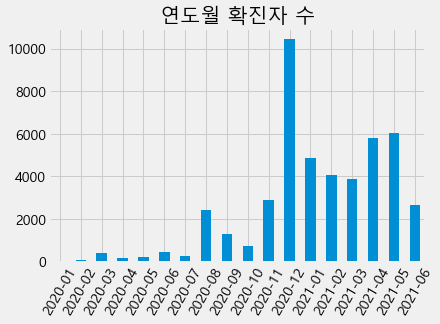

In [55]:
# 연도월을 막대 그래프로 시각화 합니다.
year_month.plot.bar(title='연도월 확진자 수', rot=60)

### 요일별 빈도수 구하기

In [56]:
# 빈도수 구하고 인덱스 번호로 정렬합니다.
# weekday_count 변수에 담아 재사용합니다.
# weekday_count
weekday_count  = df['요일명'].value_counts()
weekday_count 

목    7379
화    7346
수    7177
금    7011
토    6500
월    5866
일    5453
Name: 요일명, dtype: int64

In [57]:
# 리스트컴프리헨션 사용해서 리스트 만들기
# "월화수목금토일" 리스트로 만들어 weekday_list 변수로 재사용하기
# weekday_list
weekday_list=[]

for i in '월화수목금토일':
    weekday_list.append(i)
weekday_list

['월', '화', '수', '목', '금', '토', '일']

In [58]:
weekday_list = [i for i in '월화수목금토일']
weekday_list

['월', '화', '수', '목', '금', '토', '일']

In [59]:
# 인덱스 값을 요일명으로 변경하고 시각화 합니다.
# weekday_count.index

weekday_count

목    7379
화    7346
수    7177
금    7011
토    6500
월    5866
일    5453
Name: 요일명, dtype: int64

In [60]:
weekday_count[weekday_list]

월    5866
화    7346
수    7177
목    7379
금    7011
토    6500
일    5453
Name: 요일명, dtype: int64

In [61]:
weekday_count[['월', '화']]

월    5866
화    7346
Name: 요일명, dtype: int64

In [62]:
## 중요 (또다른 방법)

wc = df['요일'].value_counts().sort_index()
wc.index = weekday_list
wc

월    5866
화    7346
수    7177
목    7379
금    7011
토    6500
일    5453
Name: 요일, dtype: int64

<AxesSubplot:>

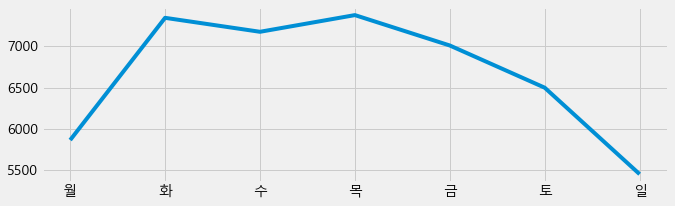

In [63]:
# 범주형에 가까울 때는 bar로 그린다.
wc.plot(figsize=(10,3))

<AxesSubplot:title={'center':'요일별 확진 수'}>

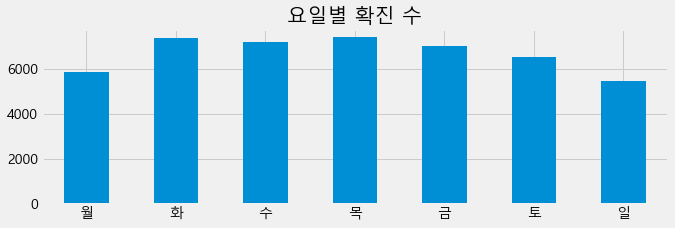

In [64]:
wc.plot.bar(figsize=(10,3), rot=0, title = '요일별 확진 수')

Text(0, 1, '1')

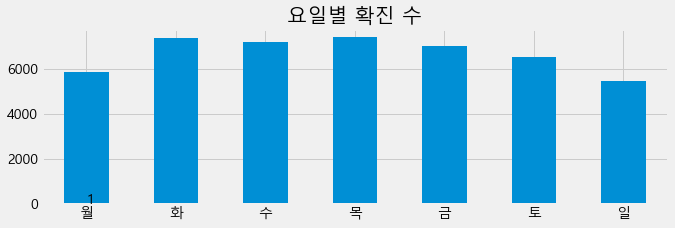

In [65]:
# 그래프에 숫자 표시하는 방법
g = wc.plot.bar(figsize=(10,3), rot=0, title = '요일별 확진 수')
g.text(0,1,"1")

0 5866
1 7346
2 7177
3 7379
4 7011
5 6500
6 5453


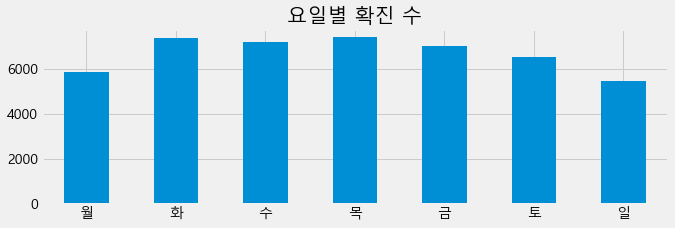

In [66]:
# enumerate 사용 (인덱스 값 까지 나오게 하는 함수)
g = wc.plot.bar(figsize=(10,3), rot=0, title = '요일별 확진 수')
for i, w in enumerate(wc):
    print(i,w)

0 5866
1 7346
2 7177
3 7379
4 7011
5 6500
6 5453


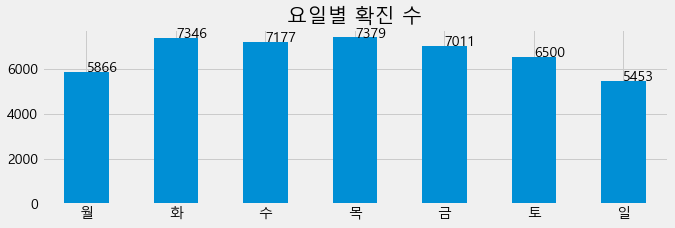

In [67]:
g = wc.plot.bar(figsize=(10,3), rot=0, title = '요일별 확진 수')
for i, w in enumerate(wc):
    print(i,w)
    g.text(i,w,w)

0 5866
1 7346
2 7177
3 7379
4 7011
5 6500
6 5453


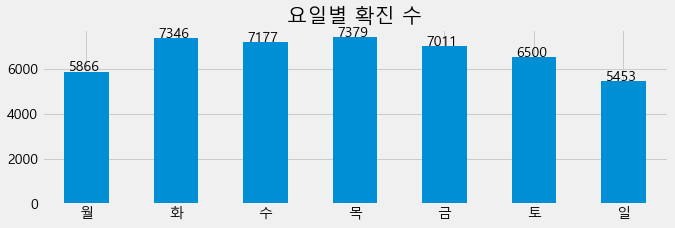

In [68]:
# 숫자 위치 조정
g = wc.plot.bar(figsize=(10,3), rot=0, title = '요일별 확진 수')
for i, w in enumerate(wc):
    print(i,w)
    g.text(i-0.2,w+10,w)

### 확진일 빈도수 구하기

In [69]:
# df["확진일"] 빈도수 구하고 인덱스 값인 날짜로 정렬하기
# day_count

day_count = df["확진일"].value_counts().sort_index()
day_count

2020-01-24      1
2020-01-30      3
2020-01-31      3
2020-02-02      1
2020-02-05      2
             ... 
2021-06-10    202
2021-06-11    208
2021-06-12    176
2021-06-13    122
2021-06-14    132
Name: 확진일, Length: 476, dtype: int64

<AxesSubplot:>

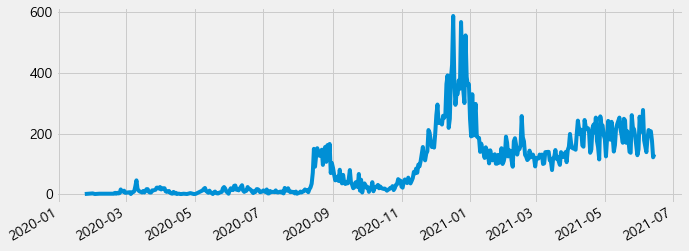

In [70]:
# 선 그래프로 시각화 하기
day_count.plot(figsize=(10, 4))

<AxesSubplot:>

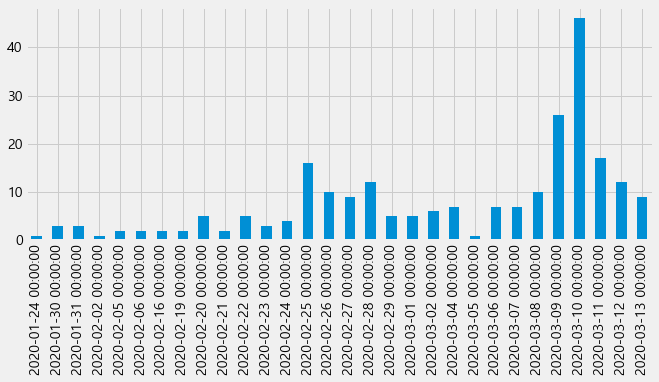

In [71]:
# 앞 30일, bar형식
day_count[:30].plot.bar(figsize=(10, 4))

## 전체 확진일 데이터 만들기
### tail로 초기 데이터 보기

In [72]:
# head(10)로 10번째 확진 데이터를 봅니다.
df.tail()

,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도,월,일,요일,연도월,요일명
연번,,,,,,,,,,,,
5,9,2020-01-31,성북구,-,기타 확진자 접촉,퇴원,2020,1,31,4,2020-01,금
4,7,2020-01-30,마포구,중국,해외유입,퇴원,2020,1,30,3,2020-01,목
3,6,2020-01-30,종로구,-,종로구 집단발병,퇴원,2020,1,30,3,2020-01,목
2,5,2020-01-30,중랑구,중국,해외유입,퇴원,2020,1,30,3,2020-01,목
1,2,2020-01-24,강서구,중국,해외유입,퇴원,2020,1,24,4,2020-01,금


In [73]:
df

,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도,월,일,요일,연도월,요일명
연번,,,,,,,,,,,,
46732,148595,2021-06-14,타시도,-,감염경로 조사중,NaN,2021,6,14,0,2021-06,월
46731,148559,2021-06-14,성동구,-,감염경로 조사중,NaN,2021,6,14,0,2021-06,월
46730,148455,2021-06-14,중랑구,-,감염경로 조사중,NaN,2021,6,14,0,2021-06,월
46729,148370,2021-06-14,강동구,-,감염경로 조사중,NaN,2021,6,14,0,2021-06,월
46728,148303,2021-06-14,광진구,카자흐스탄,감염경로 조사중,NaN,2021,6,14,0,2021-06,월
...,...,...,...,...,...,...,...,...,...,...,...,...
5,9,2020-01-31,성북구,-,기타 확진자 접촉,퇴원,2020,1,31,4,2020-01,금
4,7,2020-01-30,마포구,중국,해외유입,퇴원,2020,1,30,3,2020-01,목
3,6,2020-01-30,종로구,-,종로구 집단발병,퇴원,2020,1,30,3,2020-01,목


### iloc를 통해 첫 확진일과 마지막 확진일자 찾기

In [74]:
# last_day
last_day = df.iloc[0, 1]
last_day

Timestamp('2021-06-14 00:00:00')

In [75]:
# 이거는 행만 불러옴
# 지금 문제와는 상관 없음

df.iloc[[0,1]]

,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도,월,일,요일,연도월,요일명
연번,,,,,,,,,,,,
46732,148595,2021-06-14,타시도,-,감염경로 조사중,NaN,2021,6,14,0,2021-06,월
46731,148559,2021-06-14,성동구,-,감염경로 조사중,NaN,2021,6,14,0,2021-06,월


In [76]:
# 행렬 불러오기
df.iloc[0]

환자                   148595
확진일     2021-06-14 00:00:00
거주지                     타시도
여행력                       -
접촉력                감염경로 조사중
퇴원현황                    NaN
연도                     2021
월                         6
일                        14
요일                        0
연도월                 2021-06
요일명                       월
Name: 46732, dtype: object

In [77]:
# first_day
first_day = df.iloc[-1, 1]
first_day

Timestamp('2020-01-24 00:00:00')

### date_range로 전체 기간 데이터 만들기

In [78]:
# pd.date_range 로 전체 기간을 생성합니다.
# all_day
all_day = pd.date_range(first_day, last_day)
all_day

DatetimeIndex(['2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27',
               '2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31',
               '2020-02-01', '2020-02-02',
               ...
               '2021-06-05', '2021-06-06', '2021-06-07', '2021-06-08',
               '2021-06-09', '2021-06-10', '2021-06-11', '2021-06-12',
               '2021-06-13', '2021-06-14'],
              dtype='datetime64[ns]', length=508, freq='D')

In [79]:
# all_day 를 데이터프레임으로 변환합니다.
all_day.to_frame()

,0
2020-01-24,2020-01-24
2020-01-25,2020-01-25
2020-01-26,2020-01-26
2020-01-27,2020-01-27
2020-01-28,2020-01-28
...,...
2021-06-10,2021-06-10
2021-06-11,2021-06-11
2021-06-12,2021-06-12
2021-06-13,2021-06-13


In [80]:
df_all_day = all_day.to_frame()
df_all_day

,0
2020-01-24,2020-01-24
2020-01-25,2020-01-25
2020-01-26,2020-01-26
2020-01-27,2020-01-27
2020-01-28,2020-01-28
...,...
2021-06-10,2021-06-10
2021-06-11,2021-06-11
2021-06-12,2021-06-12
2021-06-13,2021-06-13


In [81]:
# "확진수" 라는 컬럼을 생성해서 위에서 구한 day_count 를 추가합니다.
# 확진자가 없는 날도 인덱스에 생성이 됩니다.
# day_count = df["확진일"].value_counts().sort_index()
# [97] 참고

df_all_day['확진수'] = day_count
df_all_day

,0,확진수
2020-01-24,2020-01-24,1.0
2020-01-25,2020-01-25,NaN
2020-01-26,2020-01-26,NaN
2020-01-27,2020-01-27,NaN
2020-01-28,2020-01-28,NaN
...,...,...
2021-06-10,2021-06-10,202.0
2021-06-11,2021-06-11,208.0
2021-06-12,2021-06-12,176.0
2021-06-13,2021-06-13,122.0


In [82]:
# 필요 없는 0 컬럼을 삭제합니다.
# del df_all_day[0]
# drop 방법아님

del df_all_day[0]

In [83]:
df_all_day.head()

,확진수
2020-01-24,1.0
2020-01-25,NaN
2020-01-26,NaN
2020-01-27,NaN
2020-01-28,NaN


### 결측치 채우기

In [84]:
# 비어있는 값은 확진자가 없었던 날이기 때문에 fillna로 0으로 채웁니다.
# df_all_day.fillna()

In [85]:
# day_count 에서 초기 30개의 데이터에 대해서 슬라이싱 해서 시각화 합니다.
# day_count[:30].plot()

### 누적 확진 수 구하기

In [86]:
# df

In [87]:
# cumsum 으로 "누적확진수" 구해서 새로운 변수에 담기
# df_all_day["누적확진수"]
# 결측치는 빼고 누적수를 더 한다.

df_all_day['누적확진수'] = df_all_day['확진수'].cumsum()
df_all_day


,확진수,누적확진수
2020-01-24,1.0,1.0
2020-01-25,NaN,NaN
2020-01-26,NaN,NaN
2020-01-27,NaN,NaN
2020-01-28,NaN,NaN
...,...,...
2021-06-10,202.0,46094.0
2021-06-11,208.0,46302.0
2021-06-12,176.0,46478.0
2021-06-13,122.0,46600.0


In [88]:
# 0으로 na값을 채운다.
df_all_day['확진수'] = df_all_day['확진수'].fillna(0)

In [89]:
# 누적으로 더하는데 앞에 것을 더한다.
df_all_day['누적확진수'] = df_all_day['누적확진수'].fillna(method='ffill')
df_all_day 

,확진수,누적확진수
2020-01-24,1.0,1.0
2020-01-25,0.0,1.0
2020-01-26,0.0,1.0
2020-01-27,0.0,1.0
2020-01-28,0.0,1.0
...,...,...
2021-06-10,202.0,46094.0
2021-06-11,208.0,46302.0
2021-06-12,176.0,46478.0
2021-06-13,122.0,46600.0


<AxesSubplot:>

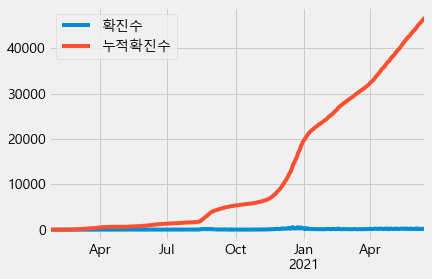

In [90]:
# 시각화 하기
df_all_day.plot()

<AxesSubplot:title={'center':'확진 수'}>

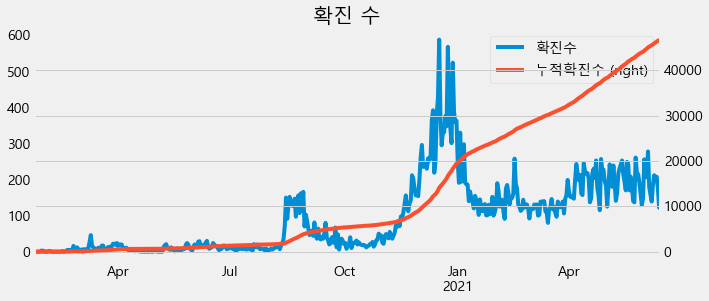

In [91]:
# y축에 추가로 범위 표시 해주는게 secondary_y

df_all_day.plot(secondary_y='누적확진수', figsize=(10,4), title='확진 수')

<AxesSubplot:ylabel='누적확진수'>

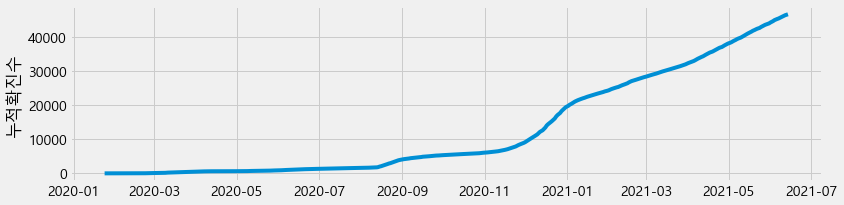

In [131]:
# 다른 방법으로 그리기 
import seaborn as sns 
plt.figure(figsize=(12, 3))
sns.lineplot(data=df_all_day, x=df_all_day.index, y='누적확진수')

<AxesSubplot:>

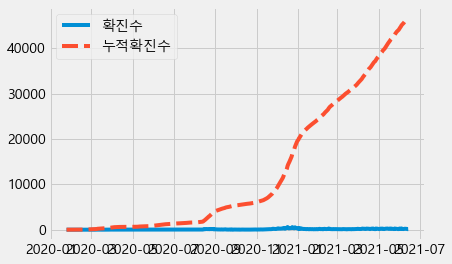

In [132]:
# 판다스의 경우에는 중심축을 읽을 수가 없다 = plot
# seaborn 같은 경우에는 중심축이 기본으로 지정이 되거나, 추가적으로 지정할 수 있다.  

sns.lineplot(data=df_all_day)

## 거주지

<AxesSubplot:>

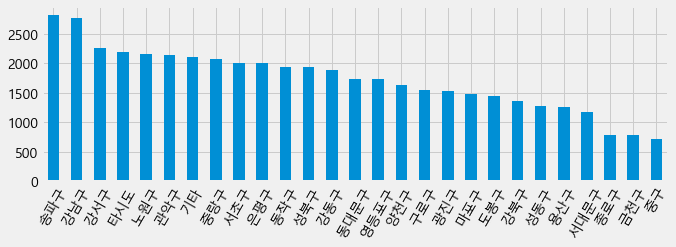

In [137]:
# 거주지 빈도수 구하기
gu_count = df['거주지'].value_counts()
gu_count.plot.bar(rot=60, figsize=(10,3))

<AxesSubplot:>

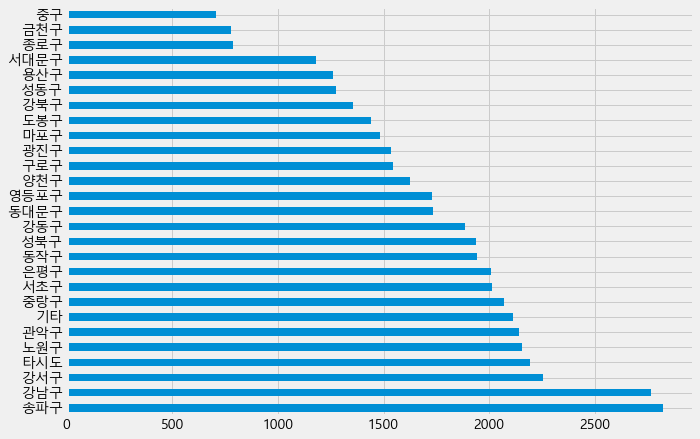

In [142]:
gu_count.plot.barh(figsize=(10,7))

### 타시도, 기타 전처리

In [144]:
# "거주지" => "거주구"로 사본 생성
# df["거주구"]

df['거주구'] = df['거주지']
df.head(1)

,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도,월,일,요일,연도월,요일명,거주구
연번,,,,,,,,,,,,,
46732,148595,2021-06-14,타시도,-,감염경로 조사중,NaN,2021,6,14,0,2021-06,월,타시도


In [146]:
# 텍스트 앞뒤 공백 제거하기
df['거주구'].str.strip()

연번
46732    타시도
46731    성동구
46730    중랑구
46729    강동구
46728    광진구
        ... 
5        성북구
4        마포구
3        종로구
2        중랑구
1        강서구
Name: 거주구, Length: 46732, dtype: object

In [153]:
# 타시도 => 기타로 변경하기
df.loc[df['거주구'] == '타시도', '거주구'] = '기타'


연번
46732     True
46731    False
46730    False
46729    False
46728    False
         ...  
5        False
4        False
3        False
2        False
1        False
Name: 거주구, Length: 46732, dtype: bool

<AxesSubplot:>

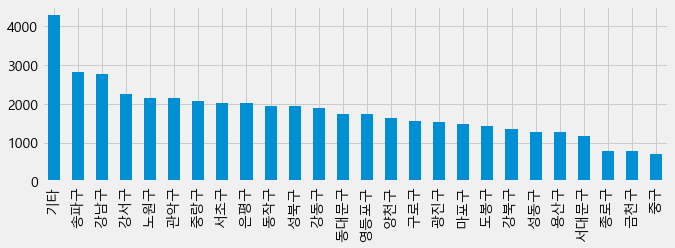

In [156]:
# "거주구" 빈도수 구하기
gu_count = df['거주구'].value_counts()


<AxesSubplot:>

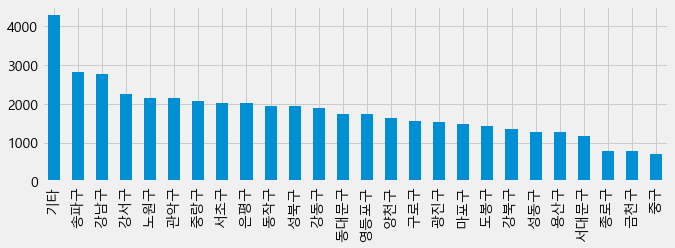

In [157]:
# gu_count 변수에 담긴 값 시각화 하기
gu_count.plot.bar(figsize=(10, 3))

## 두 개의 변수에 대한 빈도수 구하기
### 연도, 퇴원현황 두 개의 변수에 대한 빈도수 구하기

In [158]:
# pd.crosstab 으로 연도, 퇴원현황 두 개의 변수에 대한 빈도수 구하기
# 연도, 퇴원현황 빈도수 구하기
pd.crosstab(df['연도'], df['퇴원현황'])

퇴원현황,사망,퇴원
연도,,
2020,306,19058
2021,195,24559


In [164]:
# pd.crosstab 으로 연도, 퇴원현황 두 개의 변수에 대한 빈도 빈율 구하기
pd.crosstab(df['연도'], df['퇴원현황'], normalize=True) * 100

퇴원현황,사망,퇴원
연도,,
2020,0.693594,43.197788
2021,0.441996,55.666621


### 연도, 월 두 개의 변수에 대한 빈도수 구하기

In [165]:
# pd.crosstab 으로 연도, 월 두 개의 변수에 대한 빈도수 구하기
pd.crosstab(df['연도'], df['월'], normalize=True) * 100

월,1,2,3,4,5,6,7,8,9,10,11,12
연도,,,,,,,,,,,,
2020,0.014979,0.171189,0.836686,0.333818,0.490028,0.982196,0.601301,5.167765,2.794659,1.568518,6.214157,22.320894
2021,10.440383,8.689977,8.341179,12.419755,12.903364,5.709150,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [172]:
ym = pd.crosstab(df['연도'], df['월'])
ym 

월,1,2,3,4,5,6,7,8,9,10,11,12
연도,,,,,,,,,,,,
2020,7,80,391,156,229,459,281,2415,1306,733,2904,10431
2021,4879,4061,3898,5804,6030,2668,0,0,0,0,0,0


<AxesSubplot:xlabel='연도'>

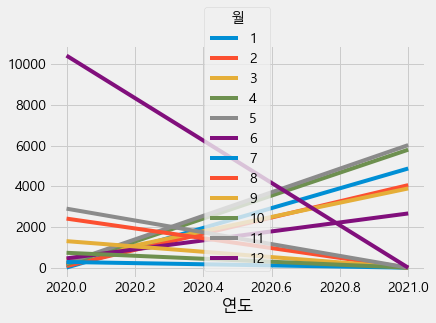

In [173]:
# 시각화 하기 
# 시각화가 눈에 잘 안들어옴

ym.plot()

<AxesSubplot:xlabel='월'>

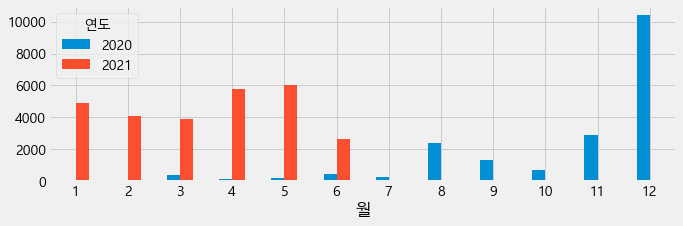

In [176]:
# 월별로 Transpose() 한다.
ym.T.plot.bar(rot=0, figsize=(10,3))

### 연도, 요일 두 개의 변수에 대한 빈도수 구하기

In [178]:
# pd.crosstab 으로 연도, 요일 두 개의 변수에 대한 빈도수 구하기
yw = pd.crosstab(df['연도'], df['요일'])
yw

요일,0,1,2,3,4,5,6
연도,,,,,,,
2020,2626,2895,2890,3462,2700,2676,2143
2021,3240,4451,4287,3917,4311,3824,3310


In [182]:
# 리스트컴프리헨션 사용해서 리스트 만들기
# weekday_list
weekday_list


,월,화,수,목,금,토,일
연도,,,,,,,
2020,2626,2895,2890,3462,2700,2676,2143
2021,3240,4451,4287,3917,4311,3824,3310


In [183]:
# 컬럼명 변경하기
yw.columns = weekday_list 
yw

,월,화,수,목,금,토,일
연도,,,,,,,
2020,2626,2895,2890,3462,2700,2676,2143
2021,3240,4451,4287,3917,4311,3824,3310


### 거주구, 연도월에 대한 빈도수 구하기

In [191]:
# pd.crosstab 으로 두 개 변수에 대한 빈도수 구하기
# 거주구, 연도월에 대한 빈도수 구하기
gu_m = pd.crosstab(df['거주구'], df['연도월'])
gu_m

연도월,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06
거주구,,,,,,,,,,,,,,,,,,
강남구,0,7,34,23,11,8,15,88,84,87,156,422,226,118,240,428,529,292
강동구,0,4,6,3,11,11,14,94,42,19,74,303,180,161,252,253,314,145
강북구,0,0,5,0,9,10,4,85,31,15,41,245,174,124,125,133,266,87
강서구,1,1,20,4,19,33,25,117,65,22,305,729,213,96,133,217,189,66
관악구,0,4,30,9,16,58,27,106,135,86,74,473,163,182,129,313,226,109
광진구,0,1,5,2,6,3,5,74,34,11,43,279,119,155,253,239,214,90
구로구,0,1,33,1,6,45,5,60,32,22,72,348,179,237,126,142,183,54
금천구,0,1,11,0,3,17,7,34,20,5,27,201,72,69,26,84,146,54
기타,0,10,22,13,12,25,12,175,128,82,204,1620,612,415,243,319,249,163


In [196]:
print(plt.colormaps())

['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r

In [197]:
# background_gradient() 로 빈도수 표현하기 .style.background_gradient()
gu_m.style.background_gradient(cmap='Greens_r')

연도월,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06
거주구,,,,,,,,,,,,,,,,,,
강남구,0,7,34,23,11,8,15,88,84,87,156,422,226,118,240,428,529,292
강동구,0,4,6,3,11,11,14,94,42,19,74,303,180,161,252,253,314,145
강북구,0,0,5,0,9,10,4,85,31,15,41,245,174,124,125,133,266,87
강서구,1,1,20,4,19,33,25,117,65,22,305,729,213,96,133,217,189,66
관악구,0,4,30,9,16,58,27,106,135,86,74,473,163,182,129,313,226,109
광진구,0,1,5,2,6,3,5,74,34,11,43,279,119,155,253,239,214,90
구로구,0,1,33,1,6,45,5,60,32,22,72,348,179,237,126,142,183,54
금천구,0,1,11,0,3,17,7,34,20,5,27,201,72,69,26,84,146,54
기타,0,10,22,13,12,25,12,175,128,82,204,1620,612,415,243,319,249,163


In [199]:
# gu_month.T 로 행과 열을 바꾼 뒤에 보기
# background_gradient()
gu_m.T.style.background_gradient()

거주구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,기타,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
연도월,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,3,0,1
2020-02,7,4,0,1,4,1,1,1,10,8,0,1,1,0,4,4,3,1,12,1,1,0,7,8,0,0
2020-03,34,6,5,20,30,5,33,11,22,12,6,25,23,16,9,21,3,13,15,17,18,12,14,4,5,12
2020-04,23,3,0,4,9,2,1,0,13,3,3,5,7,7,6,13,13,9,10,3,4,6,7,1,1,3
2020-05,11,11,9,19,16,6,6,3,12,8,10,3,9,3,8,4,21,5,11,7,11,20,7,3,3,3
2020-06,8,11,10,33,58,3,45,17,25,13,43,4,13,12,8,15,9,4,7,42,29,12,18,3,3,14
2020-07,15,14,4,25,27,5,5,7,12,6,2,6,17,14,6,7,8,9,44,1,7,4,11,6,8,11
2020-08,88,94,85,117,106,74,60,34,175,192,73,74,110,79,52,79,33,244,161,78,67,48,122,37,30,103
2020-09,84,42,31,65,135,34,32,20,128,60,69,34,57,30,34,52,30,48,79,31,53,21,65,23,8,41


In [212]:
# gu_month 에서 ["강남구", "서초구", "송파구"] 만 가져오기
gu_m.loc[["강남구", "서초구", "송파구"]]

연도월,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06
거주구,,,,,,,,,,,,,,,,,,
강남구,0,7,34,23,11,8,15,88,84,87,156,422,226,118,240,428,529,292
서초구,0,4,21,13,4,15,7,79,52,39,239,353,143,108,162,360,265,147
송파구,0,12,15,10,11,7,44,161,79,61,210,508,242,209,208,382,440,225


In [215]:
# gu_month 에서 ["2021-04", "2021-05"] 만 가져오기
# 두 가지 방법이 있다.

gu_m.loc[:, ["2021-04", "2021-05"]]

연도월,2021-04,2021-05
거주구,,
강남구,428,529
강동구,253,314
강북구,133,266
강서구,217,189
관악구,313,226
광진구,239,214
구로구,142,183
금천구,84,146
기타,319,249


In [223]:
gu_m.loc[:, ["2021-04", "2021-05"]].style.background_gradient()

연도월,2021-04,2021-05
거주구,,
강남구,428,529
강동구,253,314
강북구,133,266
강서구,217,189
관악구,313,226
광진구,239,214
구로구,142,183
금천구,84,146
기타,319,249


In [224]:
gu_m[["2021-04", "2021-05"]]

연도월,2021-04,2021-05
거주구,,
강남구,428,529
강동구,253,314
강북구,133,266
강서구,217,189
관악구,313,226
광진구,239,214
구로구,142,183
금천구,84,146
기타,319,249


In [225]:
# gu_month 에서 ["강남구", "서초구", "송파구"]와 ["2021-04", "2021-05"] 만 가져오기
# .loc[행, 열]
gu_m.loc[["강남구", "서초구", "송파구"], ["2021-04", "2021-05"]]

연도월,2021-04,2021-05
거주구,,
강남구,428,529
서초구,360,265
송파구,382,440


## Boolean Indexing 으로 특정 조건 값 찾기
### 여러 조건 비교하기

In [228]:
# 강남구에서 "일요일"에 확진된 데이터만 찾기
# .loc[행]
# .loc[행, 열]
# .loc[조건, 열]
df
df[(df['거주구'] == '강남구') & (df['요일명'] == '일')]

,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도,월,일,요일,연도월,요일명,거주구
연번,,,,,,,,,,,,,
46594,148233,2021-06-13,강남구,-,감염경로 조사중,NaN,2021,6,13,6,2021-06,일,강남구
46581,148179,2021-06-13,강남구,-,기타 확진자 접촉,NaN,2021,6,13,6,2021-06,일,강남구
46580,148153,2021-06-13,강남구,-,감염경로 조사중,NaN,2021,6,13,6,2021-06,일,강남구
46568,148163,2021-06-13,강남구,-,감염경로 조사중,NaN,2021,6,13,6,2021-06,일,강남구
46542,148107,2021-06-13,강남구,-,감염경로 조사중,NaN,2021,6,13,6,2021-06,일,강남구
...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,9642,2020-03-29,강남구,-,감염경로 조사중,퇴원,2020,3,29,6,2020-03,일,강남구
429,9607,2020-03-29,강남구,영국,해외유입,퇴원,2020,3,29,6,2020-03,일,강남구
428,9603,2020-03-29,강남구,미국,해외유입,퇴원,2020,3,29,6,2020-03,일,강남구


In [230]:
# 거주구가 강남구이며, 여행력이 일본인 데이터 찾기
# df[(df['거주구'] == '강남구') & (df['여행력'] == '일본인')] -> 딱 매치되는 것만 찾기 때문에 아래 str.contains('일본') 사용

df[(df['거주구'] == '강남구') & (df['여행력'].str.contains('일본'))]

,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도,월,일,요일,연도월,요일명,거주구
연번,,,,,,,,,,,,,
31136,99978,2021-03-24,강남구,일본,감염경로 조사중,퇴원,2021,3,24,2,2021-03,수,강남구
12540,44037,2020-12-14,강남구,일본,해외유입,퇴원,2020,12,14,0,2020-12,월,강남구


### str.contains 활용하기

In [233]:
# 접촉력의 영문자 검색을 위해 영문자를 모두 대문자로 만들고 "접촉력_대문자"컬럼을 생성하기
df['접촉력_대문자'] = df['접촉력'].str.upper() 
df.head()

,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도,월,일,요일,연도월,요일명,거주구,접촉력_대문자
연번,,,,,,,,,,,,,,
46732,148595,2021-06-14,타시도,-,감염경로 조사중,NaN,2021,6,14,0,2021-06,월,기타,감염경로 조사중
46731,148559,2021-06-14,성동구,-,감염경로 조사중,NaN,2021,6,14,0,2021-06,월,성동구,감염경로 조사중
46730,148455,2021-06-14,중랑구,-,감염경로 조사중,NaN,2021,6,14,0,2021-06,월,중랑구,감염경로 조사중
46729,148370,2021-06-14,강동구,-,감염경로 조사중,NaN,2021,6,14,0,2021-06,월,강동구,감염경로 조사중
46728,148303,2021-06-14,광진구,카자흐스탄,감염경로 조사중,NaN,2021,6,14,0,2021-06,월,광진구,감염경로 조사중


In [252]:
# "접촉력_대문자" 컬럼으로 PC방 데이터를 찾고 접촉력 컬럼에 대해서만 빈도수 구하기
## df[df['접촉력_대문자'].str.contains('PC')]['접촉력'].value_counts()
df.loc[df['접촉력_대문자'].str.contains('PC'), '접촉력'].value_counts()

강북구 소재 PC방 관련    35
강남구 소재 PC방 관련    32
강북구 소재 pc방 관련    23
동대문관련(교회pc방)     20
성동구 소재 PC방 관련    10
금천구 소재 PC방 관련     9
Name: 접촉력, dtype: int64

In [254]:
# str.contains로 여행력이 영국,프랑스,독일,스페인 인 데이터 찾기
df[df['여행력'].str.contains('영국|프랑스|독일|스페인')]

,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도,월,일,요일,연도월,요일명,거주구,접촉력_대문자
연번,,,,,,,,,,,,,,
45325,144502,2021-06-06,양천구,영국,해외유입,퇴원,2021,6,6,6,2021-06,일,양천구,해외유입
44571,142272,2021-06-03,용산구,독일,기타 확진자 접촉,퇴원,2021,6,3,3,2021-06,목,용산구,기타 확진자 접촉
41854,133614,2021-05-19,동대문구,프랑스,해외유입,퇴원,2021,5,19,2,2021-05,수,동대문구,해외유입
41030,131613,2021-05-15,은평구,독일,해외유입,퇴원,2021,5,15,5,2021-05,토,은평구,해외유입
38740,124815,2021-05-04,기타,독일,해외유입,퇴원,2021,5,4,1,2021-05,화,기타,해외유입
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,8044,2020-03-13,마포구,프랑스,해외유입,퇴원,2020,3,13,4,2020-03,금,마포구,해외유입
236,8053,2020-03-13,노원구,영국,해외유입,퇴원,2020,3,13,4,2020-03,금,노원구,해외유입
230,7923,2020-03-12,관악구,스페인,해외유입,퇴원,2020,3,12,3,2020-03,목,관악구,해외유입


### isin 으로 여러 값 찾기

In [265]:
# isin 을 사용해 리스트로 여러 값을 찾아오기
# "거주구"가 "강남구", "서초구", "송파구" 인 데이터만 찾기
# loc를 통해 해당 조건의 "접촉력" 컬럼만 가져오기

df.loc[df['거주구'].isin(["강남구", "서초구", "송파구"]), '접촉력'].value_counts()

기타 확진자 접촉                               2646
감염경로 조사중                                2028
타시도 확진자 접촉                               353
해외유입                                     220
병원 및 요양시설                                 84
                                        ... 
롯데리아 종사자 모임                                1
수도권 지인모임 관련('21.5.(5))/마포구 소재 음식점 관련       1
금천구 직장/영등포구 음식점 관련                         1
중랑구 소재 공공기관 관련                             1
서초구 소재 카페 관련                               1
Name: 접촉력, Length: 366, dtype: int64

## 여행력

In [277]:
#  접촉력이 해외유입인 데이터에 대해 "해외유입" 변수 만들기
df['해외유입'] = df['접촉력'] == '해외유입' 

In [278]:
df.head(1)

,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도,월,일,요일,연도월,요일명,거주구,접촉력_대문자,해외유입,해외유입
연번,,,,,,,,,,,,,,,,
46732,148595,2021-06-14,타시도,-,감염경로 조사중,NaN,2021,6,14,0,2021-06,월,기타,감염경로 조사중,False,False


In [284]:
# 거주구, 해외유입 빈도수 구하기
pd.crosstab(df['거주구'], df['해외유입'])

해외유입,False,True
거주구,,
강남구,2674,94
강동구,1836,50
강북구,1337,17
강서구,2214,41
관악구,2109,31
광진구,1515,18
구로구,1532,14
금천구,771,6
기타,4105,199


In [289]:
# 거주구 해외유입 비율 구하기
gu_oversea = pd.crosstab(df['거주구'], df['해외유입'], normalize=True) * 100
gu_oversea

해외유입,False,True
거주구,,
강남구,5.721989,0.201147
강동구,3.928785,0.106993
강북구,2.860995,0.036378
강서구,4.737653,0.087734
관악구,4.512968,0.066336
광진구,3.241890,0.038518
구로구,3.278268,0.029958
금천구,1.649833,0.012839
기타,8.784131,0.425832


<AxesSubplot:xlabel='거주구'>

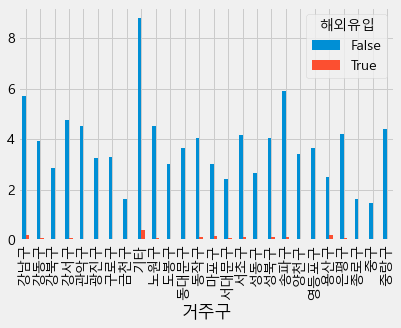

In [293]:
# 해외유입 여부에 따라 막대그래프를 그립니다.
# stacked=True 로 두 가지를 함께 그립니다.
gu_oversea.plot.bar()

<AxesSubplot:ylabel='거주구'>

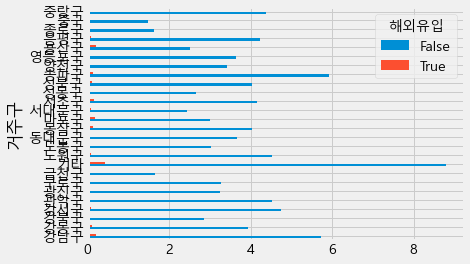

In [294]:
gu_oversea.plot.barh(stacked=True)

## pivot_table 사용하기

In [301]:
# 거주구별 해외유입 여부에 따른 빈도수 구하기
# gu_over_count
# pivot_table 기본 aggfunc은 mean이다.

pd.pivot_table(data=df, index='거주구', columns='해외유입', values='환자', aggfunc='count')

해외유입,False,True
거주구,,
강남구,2674,94
강동구,1836,50
강북구,1337,17
강서구,2214,41
관악구,2109,31
광진구,1515,18
구로구,1532,14
금천구,771,6
기타,4105,199


In [302]:
weekday_list

['월', '화', '수', '목', '금', '토', '일']

In [309]:
# 거주구에 따른 요일별 확진자 빈도수
# '요일'별 !!!!
# df_gu_weekday[weekday_list].style.bar()

gu_week = pd.pivot_table(data=df, index='거주구', columns='요일', values='환자', aggfunc='count')
gu_week

요일,0,1,2,3,4,5,6
거주구,,,,,,,
강남구,363,438,464,367,435,393,308
강동구,247,275,299,286,273,263,243
강북구,219,214,205,208,186,159,163
강서구,275,314,362,353,402,316,233
관악구,257,371,323,339,300,300,250
광진구,183,252,237,232,240,191,198
구로구,228,227,235,247,221,230,158
금천구,84,138,112,122,100,116,105
기타,614,569,625,1015,526,521,434


In [313]:
gu_week.columns = weekday_list
gu_week

,월,화,수,목,금,토,일
거주구,,,,,,,
강남구,363,438,464,367,435,393,308
강동구,247,275,299,286,273,263,243
강북구,219,214,205,208,186,159,163
강서구,275,314,362,353,402,316,233
관악구,257,371,323,339,300,300,250
광진구,183,252,237,232,240,191,198
구로구,228,227,235,247,221,230,158
금천구,84,138,112,122,100,116,105
기타,614,569,625,1015,526,521,434


In [ ]:
## 피봇테이블 보다는 크로스탭이 횔씬 더 쉽다ㅓ.

## groupby 사용하기

In [319]:
# "거주구", "해외유입" 으로 그룹화 하여 "환자" 컬럼으로 빈도수 구하기
gu_over = df.groupby(["거주구", "해외유입"])['환자'].count()
gu_over.head()

거주구  해외유입 
강남구  False    2674
     True       94
강동구  False    1836
     True       50
강북구  False    1337
Name: 환자, dtype: int64

### Groupby의 unstack()
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.unstack.html

<img src="https://pandas.pydata.org/docs/_images/reshaping_unstack.png" width="600">

In [321]:
# "거주구", "해외유입" 으로 그룹화 하여 "환자" 컬럼으로 빈도수 구하고
# 마지막 인덱스를 컬럼으로 만들기
# crosstab() = grouby() + unstack

gu_over.unstack()

해외유입,False,True
거주구,,
강남구,2674,94
강동구,1836,50
강북구,1337,17
강서구,2214,41
관악구,2109,31
광진구,1515,18
구로구,1532,14
금천구,771,6
기타,4105,199


In [329]:
# 연도, 월을 멀티인덱스로 사용하는 빈도수 구하기
gym = df.groupby(['연도', '월'])['환자'].count()
gym

연도    월 
2020  1         7
      2        80
      3       391
      4       156
      5       229
      6       459
      7       281
      8      2415
      9      1306
      10      733
      11     2904
      12    10431
2021  1      4879
      2      4061
      3      3898
      4      5804
      5      6030
      6      2668
Name: 환자, dtype: int64

In [330]:
# unstack()으로 월을 컬럼으로 만들기
gym.unstack()

월,1,2,3,4,5,6,7,8,9,10,11,12
연도,,,,,,,,,,,,
2020,7.0,80.0,391.0,156.0,229.0,459.0,281.0,2415.0,1306.0,733.0,2904.0,10431.0
2021,4879.0,4061.0,3898.0,5804.0,6030.0,2668.0,NaN,NaN,NaN,NaN,NaN,NaN


In [332]:
# ["연도", "월"] 로 그룹화 하고 "해외유입" 의 describe 값 보기
df.groupby(["연도", "월"])['해외유입'].describe()

count unique    top   freq
연도   월                             
2020 1       7      2  False      4
     2      80      2  False     71
     3     391      2  False    262
     4     156      2   True    111
     5     229      2  False    204
     6     459      2  False    436
     7     281      2  False    242
     8    2415      2  False   2365
     9    1306      2  False   1283
     10    733      2  False    689
     11   2904      2  False   2821
     12  10431      2  False  10321
2021 1    4879      2  False   4730
     2    4061      2  False   3929
     3    3898      2  False   3834
     4    5804      2  False   5724
     5    6030      2  False   5955
     6    2668      2  False   2634